In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.8.2
    Uninstalling tensorflow-datasets-4.8.2:
      Successfully uninstalled tensorflow-datasets-4.8.2


# Importing the Libraries

In [3]:
import re
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

from urduhack.preprocessing import *
from urduhack.tokenization import *
from urduhack.normalization import *

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Reading the train data from all the csv files in the dataset folder and merging into a single dataframe 

In [4]:
train_data = pd.DataFrame(columns = ['TEXT','EMOTIONS'])
for i in os.listdir("/content/drive/MyDrive/urdu-sentimental-analysis/Datasets"):
    df = pd.read_excel("/content/drive/MyDrive/urdu-sentimental-analysis/Datasets/" + i)
    df.columns = df.iloc[0,:].values
    df = df.iloc[1:,:]
    df = df[['TEXT','EMOTIONS']]
    train_data = pd.concat([train_data, df])

# Now loading the test csv file

In [5]:
test_data = pd.read_excel("/content/drive/MyDrive/urdu-sentimental-analysis/test-urdu-test.xlsx")

# Extracting the text and emotions data from the dataset

In [6]:
test_data.columns = test_data.iloc[1,:].values 
test_data = test_data.iloc[2:,:]
test_data = test_data[['TEXT', 'EMOTIONS']]

In [7]:
test_data['EMOTIONS'] = test_data['EMOTIONS'].str.upper()

# Combining the both dataframes

In [8]:
dataset = pd.concat([train_data,test_data])

# Extracting the labeled data records

In [9]:
selected_dataset =  dataset[(dataset['EMOTIONS'] == 'T') |
                            (dataset['EMOTIONS'] == 'E') |
                            (dataset['EMOTIONS'] == 'S') |
                            (dataset['EMOTIONS'] == 'D') |
                            (dataset['EMOTIONS'] == 'P') |
                            (dataset['EMOTIONS'] == 'H') |
                            (dataset['EMOTIONS'] == 'A')]

In [10]:
selected_dataset['EMOTIONS'].unique()

array(['S', 'A', 'T', 'H', 'E', 'P', 'D'], dtype=object)

# Checking for the dataset is balanced or not

In [11]:
selected_dataset['EMOTIONS'].value_counts()

S    1185
H     868
T     808
A     717
E     588
P     490
D     410
Name: EMOTIONS, dtype: int64

In [12]:
selected_dataset.shape

(5066, 2)

# Seperating the features from the dataset

In [13]:
X = selected_dataset['TEXT'].values

In [14]:
labels = selected_dataset['EMOTIONS'].values

# Encoding the labels of the dataset into a numeric form

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

In [16]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

# Creating and applying the cleaning function to clean the text of the while dataset

In [17]:
stopwords_list = ["اب","ابھی","اپنا","اپنے","اپنی","اٹھا","اس","اسے","اسی","اگر","ان","انہوں","انہی","انہیں","انھیں","او","اور","اے","ایسا","ایسے","ایسی","ایک","آ","آتا","آتے","آتی","آگے","آنا","آنے","آنی","آئے","آئی","آئیں","آیا","با","بڑا","بڑے","بڑی","بعد","بعض","بلکہ","بہت","بھی","بے","پاس","پر","پہلے","پھر","تا","تاکہ","تب","تجھ","تجھے","تک","تم","تمام","تمہارا","تمہارے","تمھارے","تمہاری","تمہیں","تمھیں","تھا","تھے","تھی","تھیں","تو","تیری","تیرے","جا","جاتا","جاتی","جاتے","جاتی","جانے","جانی","جاؤ","جائے","جائیں","جب","جس","جن","جنہوں","جنہیں","جو","جیسا","جیسے","جیسی","جیسوں","چاہیئے","چلا","چاہے","چونکہ","حالاں","حالانکہ","دو","دونوں","دوں","دے","دی","دیا","دیں","دیے","دیتا","دیتے","دیتی","دینا","دینے","دینی","دیئے","ڈالا","ڈالنا","ڈالنے","ڈالنی","ڈالے","ڈالی","ذرا","رکھا","رکھتا","رکھتے","رکھتی","رکھنا","رکھنے","رکھنی","رکھے","رکھی","رہ","رہا","رہتا","رہتے","رہتی","رہنا","رہنے","رہنی","رہو","رہے","رہی","رہیں","زیادہ","سا","سامنے","سب","سکتا","سو","سے","سی","شاید","صرف","طرح","طرف","عین","کا","کبھی","کچھ","کہہ","کر","کرتا","کرتے","کرتی","کرنا","کرنے","کرو","کروں","کرے","کریں","کس","کسے","کسی","کہ","کہا","کہے","کو","کون","کوئی","کے","کی","کیا","کیسے","کیوں","کیونکہ","کیے","کئے","گا","گویا","گے","گی","گیا","گئے","گئی","لا","لاتا","لاتے","ل","اتی","لانا","لانے","لانی","لایا","لائے","لائی","لگا","لگے","لگی","لگیں","لو","لے","لی","لیا","لیتا","لیتے","لیتی","لیکن","لیں","لیے","لئے","مجھ","مجھے","مگر","میرا","میرے","میری","میں","نا","نہ","نہایت","نہیں","نے","ہاں","ہر","ہم","ہمارا","ہمارے","ہماری","ہو","ہوا","ہوتا","ہوتے","ہوتی","ہوتیں","ہوں","ہونا","ہونگے","ہونے","ہونی","ہوئے","ہوئی","ہوئیں","ہے","ہی","ہیں","و","والا","والوں","والے","والی","وہ","وہاں","وہی","وہیں","یا","یعنی","یہ","یہاں","یہی","یہیں"]

In [18]:
def clean_text(text):
    text = normalize_whitespace(text)
    text = remove_punctuation(text)
    text = remove_accents(text)
    text = replace_urls(text)
    text = replace_emails(text)
    text = replace_currency_symbols(text)
    text = normalize_characters(text)
    text = normalize_combine_characters(text)
    text = english_characters_space(text)
    text = digits_space(text)
    text = text.lower()
    text = normalize(text)
    words = text.split()
    words = [word for word in words if not word in stopwords_list]
    text = " ".join(words)
    return text

In [19]:
X = map(clean_text, X)

In [20]:
X = list(X)

In [21]:
np.shape(X)

(5066,)

In [22]:
X[:10]

['مسافرت دولتمندی وطن درجہ وطن غربت پردیس حیثیت نہج البلاغہ کلمات قصار 56',
 'بندے طبیعت قدرے بہتر دوبارہ اوقات پہ آگیا معصوم لوگوں پہ الزام تراشی شروع',
 'ممنون حسین صاحب تھوڑا دین آشنا `سود گنجائش` بونگی مارتے',
 'محمد علی صاحب گالیاں مجہے سخت نفرت خواہ ایم عام آدمی',
 'مقبوضہ کشمیر دبیا بھر بھارتی قیادت لعن طعن جارہی ٹس مس اندازہ بھارت سرکاری ٹی چینل پڑھیئے منیر احمد بلوچ مکمل کالم dunyacolumns dunyaupdates',
 'آفسوسناکحادثہ کہنا بالکل اچھا لگ کہنا چاہتا دین دعوےداروں وجہ ٹرین آگ لگنے وجہ کتنے لوگ جھلس گئےان رلیٹد لوگوں حال بیان جاسکتا اگ فیملیوں لپیٹ',
 'حکمرانوں حسی گھر سڑکوں پہ سوتے مہمان خانہ کوئ بھوکا سوئے کیلئے لنگر خانہ بیماری حالت ہاتھ پھیلانے پڑے لہزا صحت انصاف کارڈتعلیم حق طلبا وظائف رحم احساس فلاحی ریاست بنیاد عمران خان احساسسب پروگرام',
 'فرانس آج طالبان افغان حکومت درمیان پہلی باضابطہ بات جیت آغاز ہورہا طالبان وفد شہاب الدین دلاور نعیم وردگ کررہے',
 'اونچےاونچے ناموں تختیاں جلا ظلم وردیاں جلادینا پوچھیے کائنات جلتی دیکھنے آساں بستیاں جلادینا موت ڈر زندگی ملتی جنگ جیتنا 

# Vectorizing the dataset 

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

import pickle

filename = '/content/drive/MyDrive/urdu-sentimental-analysis/Vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

# Balancing the dataset

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [25]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({5: 1185, 0: 1185, 6: 1185, 3: 1185, 2: 1185, 4: 1185, 1: 1185})


# Splitting the dataset for train and testing it

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
X_train

<6221x17888 sparse matrix of type '<class 'numpy.float64'>'
	with 116260 stored elements in Compressed Sparse Row format>

# Applying the random forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
rf_acc=accuracy_score(y_test,y_pred)

In [32]:
rf_acc

0.654291224686596

In [33]:
print(y_pred[:20])
print(y_test[:20])

[1 5 5 1 1 2 1 0 5 3 6 2 2 0 3 6 6 5 3 5]
[1 4 5 1 1 2 1 0 1 3 6 2 5 2 5 4 4 0 3 3]


##Saving Model

In [34]:
import pickle

filename = str(round(rf_acc,2))+'_RF_Model.sav'
pickle.dump(rfc, open("/content/drive/MyDrive/urdu-sentimental-analysis/models/"+filename, 'wb'))

# Applying the SVC Classifier

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [36]:
y_pred = svc.predict(X_test)

In [37]:
svc_acc=accuracy_score(y_test,y_pred)

In [38]:
svc_acc,2

(0.6779170684667309, 2)

In [39]:
print(y_pred[:20])
print(y_test[:20])

[1 5 5 5 1 2 1 0 5 3 6 2 5 0 5 4 4 5 3 5]
[1 4 5 1 1 2 1 0 1 3 6 2 5 2 5 4 4 0 3 3]


# saving mo

In [40]:
import pickle

filename = str(round(svc_acc,3))+'_SVC_Model.sav'
pickle.dump(svc, open("/content/drive/MyDrive/urdu-sentimental-analysis/models/"+filename, 'wb'))

# Applying the Sticastic Gradient Descent Classifier

In [41]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [42]:
y_pred = sgd.predict(X_test)

In [43]:
sdg_acc=accuracy_score(y_test,y_pred)

In [44]:
sdg_acc

0.6996142719382835

In [45]:
print(y_pred[:10])
print(y_test[:10])

[1 0 5 1 1 2 1 0 5 3]
[1 4 5 1 1 2 1 0 1 3]


In [46]:
import pickle
filename = str(round(sdg_acc,3))+'_SGD_Model.sav'
pickle.dump(sgd, open("/content/drive/MyDrive/urdu-sentimental-analysis/models/"+filename, 'wb'))

# Applying the decision tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dtc.predict(X_test)
dt_acc=accuracy_score(y_test,y_pred)

In [49]:
dt_acc

0.5308582449373191

In [50]:
print(y_pred[:10])
print(y_test[:10])

[1 4 3 6 2 2 1 0 3 3]
[1 4 5 1 1 2 1 0 1 3]


In [51]:
import pickle
filename = str(round(dt_acc,3))+'_Decision_tree_Model.sav'
pickle.dump(dtc, open("/content/drive/MyDrive/urdu-sentimental-analysis/models/"+filename, 'wb'))

# Testing the best model over a single text file

In [52]:
# Test over a single text file
# text = "آسان کام ہوگا"
text='پی ٹی آئی کا استعفے واپس نہ لینے کا اعلان'
text = clean_text(text)
text = vectorizer.transform([text])
# label = sgd.predict(text)
# label = svc.predict(text)
label = rfc.predict(text)

In [53]:
label

array([3])

In [54]:
le.classes_

array(['A', 'D', 'E', 'H', 'P', 'S', 'T'], dtype=object)

In [55]:
label_keys = ['A', 'D', 'E', 'H', 'P', 'S', 'T']

label_dict = {
    'A': "Anger",
    'D': "Disgust",
    'E': "Surprise",
    'H': "Joy/Happiness",    
    'P': "Anticipation",
    'S': "Sadness",
    'T': "Trust",
}
print("Label of the text is:", label_dict[label_keys[label[0]]])

Label of the text is: Joy/Happiness


## Accuraccy Comparison 

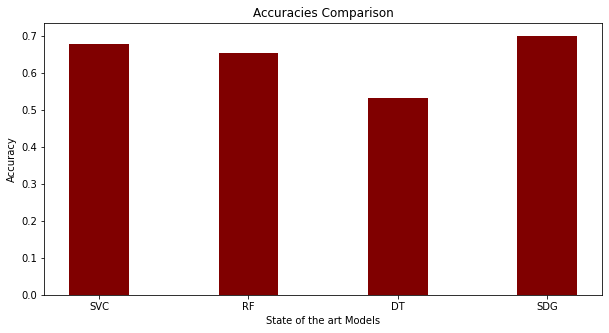

In [58]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'SVC':svc_acc, 'RF':rf_acc, 'DT':dt_acc,'SDG':sdg_acc}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("State of the art Models")
plt.ylabel("Accuracy")
plt.title("Accuracies Comparison")
plt.show()


## Inferencing by loading model

In [64]:
model = pickle.load(open("/content/drive/MyDrive/urdu-sentimental-analysis/models/0.721_SGD_Model.sav", 'rb'))
Vectorizer = pickle.load(open("/content/drive/MyDrive/urdu-sentimental-analysis/Vectorizer.sav", 'rb'))
print("Model Loaded")
print("Vectorizer Loaded")

stopwords_list = ["اب", "ابھی", "اپنا", "اپنے", "اپنی", "اٹھا", "اس", "اسے", "اسی", "اگر", "ان", "انہوں", "انہی",
                  "انہیں", "انھیں", "او", "اور", "اے", "ایسا", "ایسے", "ایسی", "ایک", "آ", "آتا", "آتے", "آتی", "آگے",
                  "آنا", "آنے", "آنی", "آئے", "آئی", "آئیں", "آیا", "با", "بڑا", "بڑے", "بڑی", "بعد", "بعض", "بلکہ",
                  "بہت", "بھی", "بے", "پاس", "پر", "پہلے", "پھر", "تا", "تاکہ", "تب", "تجھ", "تجھے", "تک", "تم", "تمام",
                  "تمہارا", "تمہارے", "تمھارے", "تمہاری", "تمہیں", "تمھیں", "تھا", "تھے", "تھی", "تھیں", "تو", "تیری",
                  "تیرے", "جا", "جاتا", "جاتی", "جاتے", "جاتی", "جانے", "جانی", "جاؤ", "جائے", "جائیں", "جب", "جس",
                  "جن", "جنہوں", "جنہیں", "جو", "جیسا", "جیسے", "جیسی", "جیسوں", "چاہیئے", "چلا", "چاہے", "چونکہ",
                  "حالاں", "حالانکہ", "دو", "دونوں", "دوں", "دے", "دی", "دیا", "دیں", "دیے", "دیتا", "دیتے", "دیتی",
                  "دینا", "دینے", "دینی", "دیئے", "ڈالا", "ڈالنا", "ڈالنے", "ڈالنی", "ڈالے", "ڈالی", "ذرا", "رکھا",
                  "رکھتا", "رکھتے", "رکھتی", "رکھنا", "رکھنے", "رکھنی", "رکھے", "رکھی", "رہ", "رہا", "رہتا", "رہتے",
                  "رہتی", "رہنا", "رہنے", "رہنی", "رہو", "رہے", "رہی", "رہیں", "زیادہ", "سا", "سامنے", "سب", "سکتا",
                  "سو", "سے", "سی", "شاید", "صرف", "طرح", "طرف", "عین", "کا", "کبھی", "کچھ", "کہہ", "کر", "کرتا",
                  "کرتے", "کرتی", "کرنا", "کرنے", "کرو", "کروں", "کرے", "کریں", "کس", "کسے", "کسی", "کہ", "کہا", "کہے",
                  "کو", "کون", "کوئی", "کے", "کی", "کیا", "کیسے", "کیوں", "کیونکہ", "کیے", "کئے", "گا", "گویا", "گے",
                  "گی", "گیا", "گئے", "گئی", "لا", "لاتا", "لاتے", "ل", "اتی", "لانا", "لانے", "لانی", "لایا", "لائے",
                  "لائی", "لگا", "لگے", "لگی", "لگیں", "لو", "لے", "لی", "لیا", "لیتا", "لیتے", "لیتی", "لیکن", "لیں",
                  "لیے", "لئے", "مجھ", "مجھے", "مگر", "میرا", "میرے", "میری", "میں", "نا", "نہ", "نہایت", "نہیں", "نے",
                  "ہاں", "ہر", "ہم", "ہمارا", "ہمارے", "ہماری", "ہو", "ہوا", "ہوتا", "ہوتے", "ہوتی", "ہوتیں", "ہوں",
                  "ہونا", "ہونگے", "ہونے", "ہونی", "ہوئے", "ہوئی", "ہوئیں", "ہے", "ہی", "ہیں", "و", "والا", "والوں",
                  "والے", "والی", "وہ", "وہاں", "وہی", "وہیں", "یا", "یعنی", "یہ", "یہاں", "یہی", "یہیں"]


Model Loaded
Vectorizer Loaded


In [65]:
def clean_text(text):
    text = normalize_whitespace(text)
    text = remove_punctuation(text)
    text = remove_accents(text)
    text = replace_urls(text)
    text = replace_emails(text)
    text = replace_currency_symbols(text)
    text = normalize_characters(text)
    text = normalize_combine_characters(text)
    text = english_characters_space(text)
    text = digits_space(text)
    text = text.lower()
    text = normalize(text)
    words = text.split()
    words = [word for word in words if not word in stopwords_list]
    text = " ".join(words)
    return text

In [72]:
# text = "آسان کام ہوگا"
text = "آج بہت مزا آیا"
text = clean_text(text)
text = Vectorizer.transform([text])
label = model.predict(text)

In [73]:
label

array([5])

In [74]:
label_keys = ['A', 'D', 'E', 'H', 'P', 'S', 'T']

label_dict = {
    'H': "Joy/Happiness",
    'S': "Sadness",
    'A': "Anger",
    'D': "Disgust",
    'P': "Anticipation",
    'T': "Trust",
    'E': "Surprise",
    'F': "Fear"
}
print("Label of the text is:", label_dict[label_keys[label[0]]])

Label of the text is: Sadness
